# Unsupervised Learning, Data Preprocessing

- 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 함
  - 비지도 변환(Unsupervised transformation)
  - 군집(Clustering)

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from scipy import sparse
%matplotlib inline

### 3.1 Unsupervised Learning Type


- 비지도 변환 : 데이터를 새롭게 표현해 원래 데이터보다 쉽게 해석할 수 있도록 하는 것
  - 차원축소(Dimensionality Reduction) : 특성의 수를 줄이면서, 필요한 특징을 포함한 데이터를 표현하는 방법
  - 성분 찾기 : 텍스트 문서에서 주제를 추출
  
- 군집 알고리즘 : 데이터를 비슷한 것끼리 그룹으로 묶는 것

### 3.2

- 알고리즘이 유용한 것을 학습했는가?에 대한 평가가 어려움.
- 보통 EDA에서 많이 사용
- 스케일링도 일종의 비지도 학습

### 3.3 Data Preprocessing, Scailing

- 신경망 알고리즘은 데이터 스케일에 민감함으로 특성값을 조절해야 함.

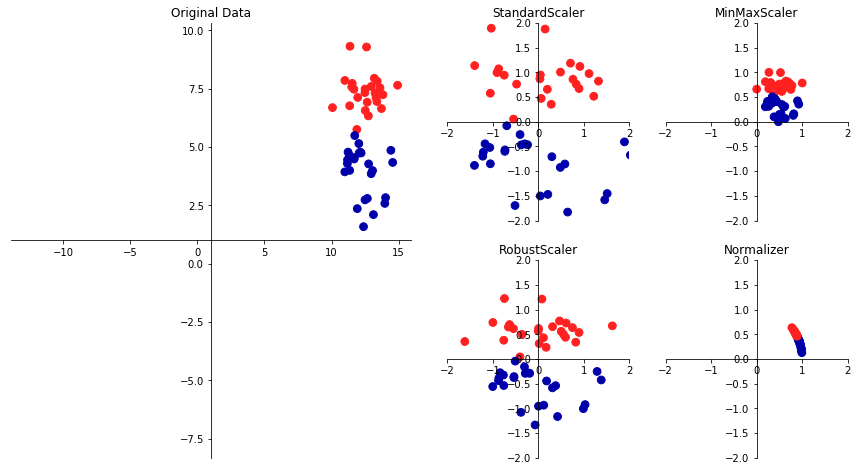

In [2]:
mglearn.plots.plot_scaling()

### 3.3.1 전처리 방법
- StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 특성이 같은 크기를 가지게 함.
- RobustScaler : 중간 값과 사분위 값 사용. 이상치의 영향을 받지 않음.
- MinMaxScaler : 모든 특성이 정확하게 0,1 사이에 위치하도록 변경함
- Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 조정함. 데이터의 방향만이 중요할때

### 3.3.2 데이터 변환 적용하기

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
# 트레이닝 데이터 변환
X_train_scaled = scaler.transform(X_train)

# 스케일을 조정한 뒤, 데이터셋의 속성을 출력
print("변환된 후 크기 : {}".format(X_train_scaled.shape))
print("===============================================================")

print("스케일 조정 전 특성별 최솟값 : {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최댓값 : {}".format(X_train.max(axis=0)))
print("===============================================================")
print("스케일 조정 후 특성별 최솟값 : {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값 : {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기 : (426, 30)
스케일 조정 전 특성별 최솟값 : [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
스케일 조정 전 특성별 최댓값 : [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.226

In [6]:
# 테스트 데이터 변환

X_test_scaled = scaler.transform(X_test)

## 스케일을 조정한 뒤, 테스트 데이터의 속성을 출력
print("스케일 조정 후 특성별 최솟값 : {}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값 : {}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최솟값 : [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값 : [ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


- 원래 0~1 사이여야 하는데 일부는 이를 벗어났음. 그렇기에 훈련세트와 테스트 세트에 같은 변환을 적용해야 함.
- transform 메서드는 테스트 세트의 최솟값/범위를 사용하지 않고, 항상 훈련세트의 통계치를 이용해야 함.

x_test - x_train_min / x_test_max - x_train_min 으로 계산.

### 3.3.3 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

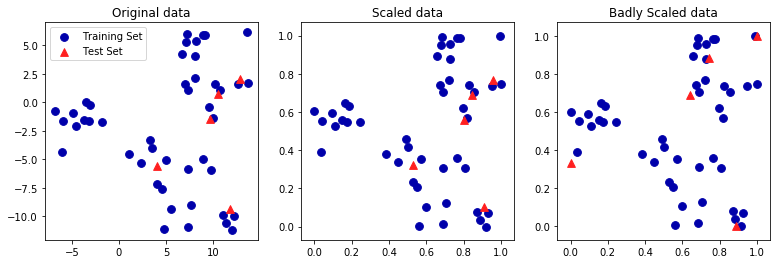

In [7]:
from sklearn.datasets import make_blobs

## 1st scatterplot
# 인위적인 데이터셋을 생성하기
X, _ = make_blobs(n_samples=50, centers = 5, random_state=4, cluster_std=2)

# 훈련/테스트 세트로 나누기
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련/테스트 세트의 스캐터플롯 그리기

fig, axes = plt.subplots(1, 3, figsize = (13,4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training Set", s=60)

axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^',
               c=mglearn.cm2(1), label="Test Set", s=60)

axes[0].legend(loc='upper left')
axes[0].set_title('Original data')

# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 2nd scatterplot
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training Set", s=60)

axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^',
               c=mglearn.cm2(1), label="Test Set", s=60)
axes[1].set_title('Scaled data')


# 3rd scatterplot
## 테스트 스케일 따로 조정해봄 (테스트 최대최소-1,0). 예제 용이므로 이렇게 만들지 말자

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training Set", s=60)

axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker = '^',
               c=mglearn.cm2(1), label="Test Set", s=60)
axes[2].set_title('Badly Scaled data')

### 3.3.4 지도 학습에서의 데이터 전처리 효과

In [8]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)


svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Accuracy of testset : {:.2f}".format(svm.score(X_test, y_test)))

Accuracy of testset : 0.63


In [9]:
## Scaling
# 0~1 사이로 스케일 조정

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
print("Accuracy of testset(adjusted) : {:.2f}".format(svm.score(X_test_scaled, y_test)))

Accuracy of testset(adjusted) : 0.97


In [10]:
## 평균 0, 분산이 1으로 조정

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
print("Accuracy of testset(adjusted) : {:.2f}".format(svm.score(X_test_scaled, y_test)))

Accuracy of testset(adjusted) : 0.96


### 3.4 Dimensionality reduction, feature extraction, manifold learning
- 시각화, 데이터 압축, 추가적인 처리(지도 학습 사용용)를 위해 보통 비지도학습을 통해 데이터 변환 시도
- 주성분 분석(Pricipal Component Analysis, PCA), 비음수 행렬 분해(Non-negative Matrix Factorization, NMF), 2차원 산점도 시각화(t-Distributed stochastic neighbor embedding, t-SNE)

### 3.4.1 주성분 분석
  - 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
    - 회전시킨 뒤 데이터를 설명하는 데 얼마나 중요하냐에 따라 새 특성 중에 일부만 선택

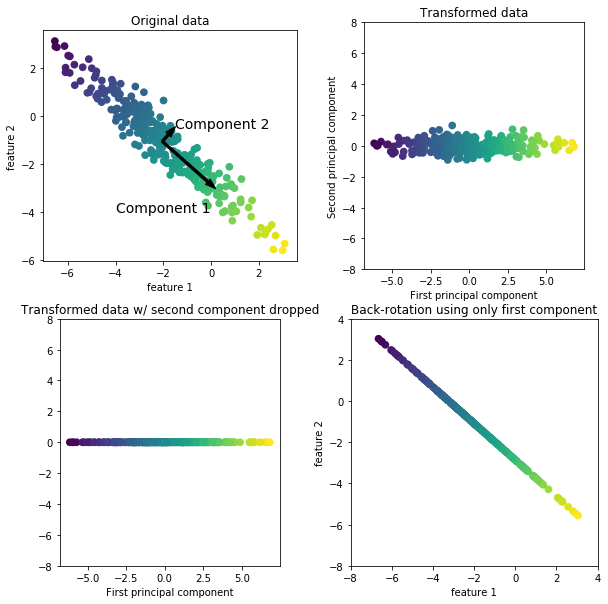

In [11]:
mglearn.plots.plot_pca_illustration()

1. 분산이 가장 큰 방향(component 1)을 찾는다.
 - 이 방향이 데이터에서 가장 많은 정보를 담고 있다. (상관관계가 크다)
2. 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다.
 - 차원 수가 높을수록 무한히 많은 직각 방향이 있을 수 있다.
 - 머리와 꼬리가 중요한 것은 아니다 

이런 과정들을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서, *주성분* 이라고 한다.

일반적으로 원본 특성 개수만큼의 주성분이 있다.


- 1사분면 -> 2사분면 데이터를 회전 시킨 것. 평균을 빼서 중심을 원점으로 맞춰두었음. 상관관계 행렬이 0임
- 3사분면 -> 주성분의 일부만 남기는 차원 축소
- 4사분면 -> 다시 평균을 더해서 반대로 회전시키고, 첫번째 주성분의 정보만 갖고 있음.

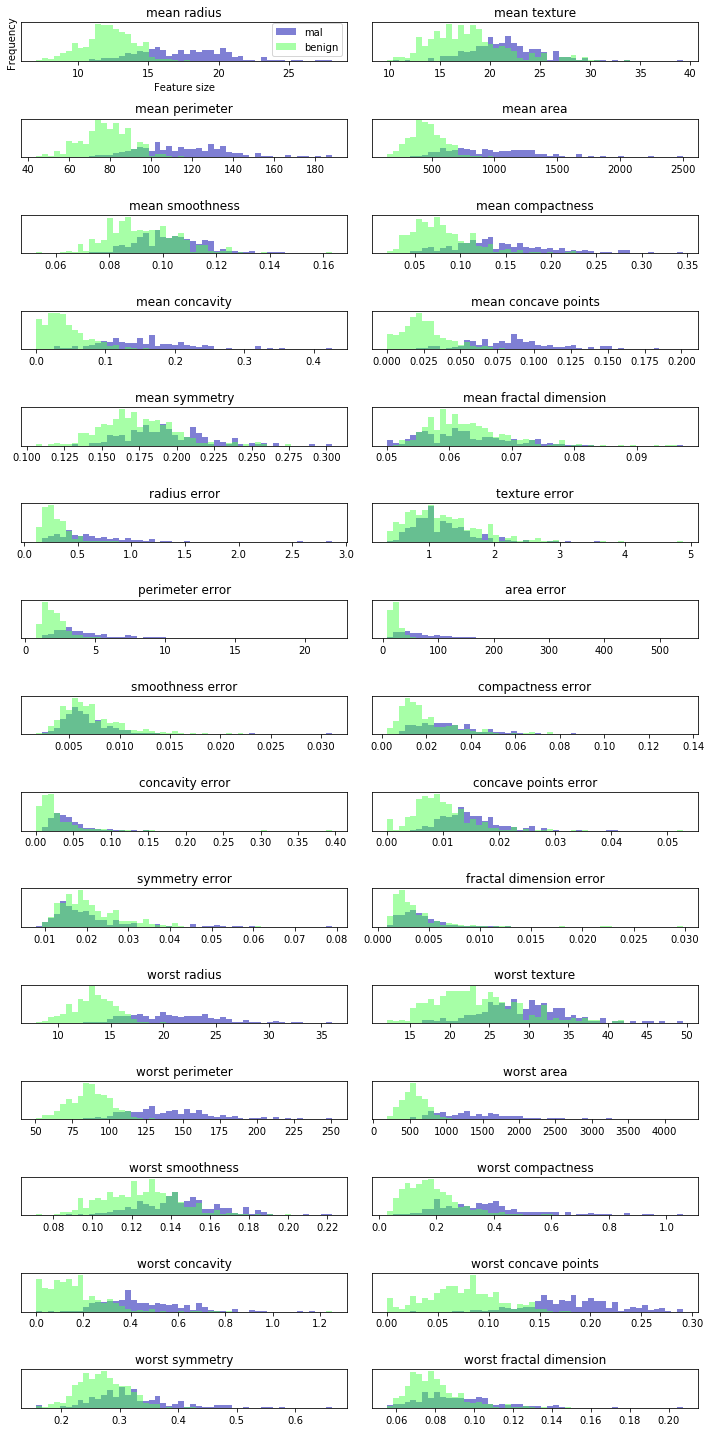

In [12]:
## PCA 시각화 - 유방암 데이터에서 양성/음성 클래스에 대해 특성 히스토그램 그려보기

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1] ## 양성의

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5) 
    ax[i].set_title(cancer.feature_names[i]) 
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature size")
ax[0].set_ylabel("Frequency")
ax[0].legend(["mal", "benign"], loc="best")
fig.tight_layout()

겹처진 데이터에는 큰 의미가 없지만(ex.smoothness error) 구분된 히스토그램(worst concave points)에는 유용함

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


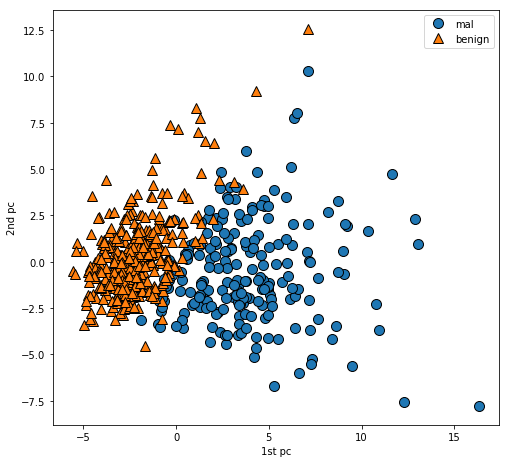

In [13]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA

# 2개의 주성분만 유지하게 함
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

# PCA 시각화

plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 1], cancer.target)
plt.legend(["mal","benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st pc")
plt.ylabel("2nd pc")

- PCA는 데이터의 상관관계만을 고려함
- 주성분 2개만을 이용하여 만들었음. 나름 2개로 구분이 잘 되는것으로 보임
- 선형 분류기로도 분류가 잘 가능할것 처럼 보임


- 그래프 두 축을 해석하기가 어려움

PCA 주성분 형태: (2, 30)
PCA 주성분: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


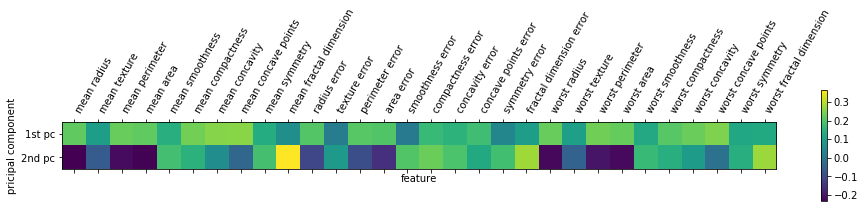

In [14]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))
print("PCA 주성분: \n{}".format(pca.components_))

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["1st pc", "2nd pc"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha="left")
plt.xlabel("feature")
plt.ylabel("pricipal component")

people.iamges.shape : (3023, 87, 65)
클래스 개수 : 62


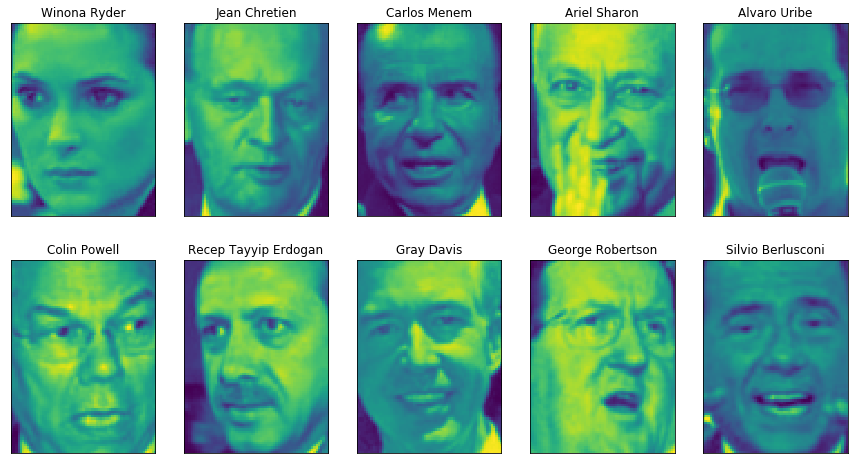

In [15]:
### 고유얼굴(eigenface) 특성 추출

from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize = (15,8),
                        subplot_kw={'xticks' :(), 'yticks': ()})

for target, images, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(images)
    ax.set_title(people.target_names[target])

print("people.iamges.shape : {}".format(people.images.shape))
print("클래스 개수 : {}".format(len(people.target_names)))

In [16]:
# 타겟이 나타난 횟수 계산
counts = np.bincount(people.target)

# 타겟 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name, count), end='   ')
    if (i+1) % 3 == 0:
        print()
        
## 조지 부시, 콜린 파월의 갯수가 많은편(이미지 편중)

Alejandro Toledo          39   Alvaro Uribe              35   Amelie Mauresmo           21   
Andre Agassi              36   Angelina Jolie            20   Ariel Sharon              77   
Arnold Schwarzenegger     42   Atal Bihari Vajpayee      24   Bill Clinton              29   
Carlos Menem              21   Colin Powell             236   David Beckham             31   
Donald Rumsfeld          121   George Robertson          22   George W Bush            530   
Gerhard Schroeder        109   Gloria Macapagal Arroyo   44   Gray Davis                26   
Guillermo Coria           30   Hamid Karzai              22   Hans Blix                 39   
Hugo Chavez               71   Igor Ivanov               20   Jack Straw                28   
Jacques Chirac            52   Jean Chretien             55   Jennifer Aniston          21   
Jennifer Capriati         42   Jennifer Lopez            21   Jeremy Greenstock         24   
Jiang Zemin               20   John Ashcroft             53 

In [17]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

얼굴 인식 : 새로운 얼굴 이미지가 데이터베이스에 있는 기존 얼굴 중에 속하는가?
 - 그러나 사람의 수는 많지만 훈련 데이터가 너무 적다
 - 대규모 다시 훈련시키지 않아도 새로운 사람의 얼굴을 쉽게 추가시킬수 있어야 함
 
그래서 1-최근접 이웃 분류기 사용. 클래스마다 하나의 훈련 샘플을 사용함

In [18]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split( X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 점수: 0.23


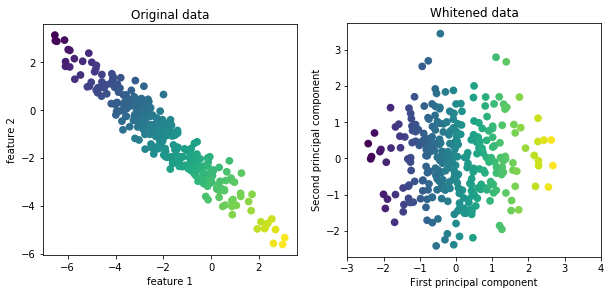

In [19]:
mglearn.plots.plot_pca_whitening()

픽셀을 있는 그대로 비교하는 방식은 얼굴의 특징을 잡아내기가 어려움.

0.23이면 4개중에 1개 맞는다고 하는건데 극악임. 차라리 반대로 한다고 하면 모를까

- 주성분으로 변환하여 거리를 계산. 정확도를 높임 : PCA Whitening

In [20]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))
# 세 데이터는 처음 100개의 주성분에 해당하는 특성을 가짐

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train_pca.shape: (1547, 100)
테스트 세트 정확도: 0.31


pca.components_.shape: (100, 5655)


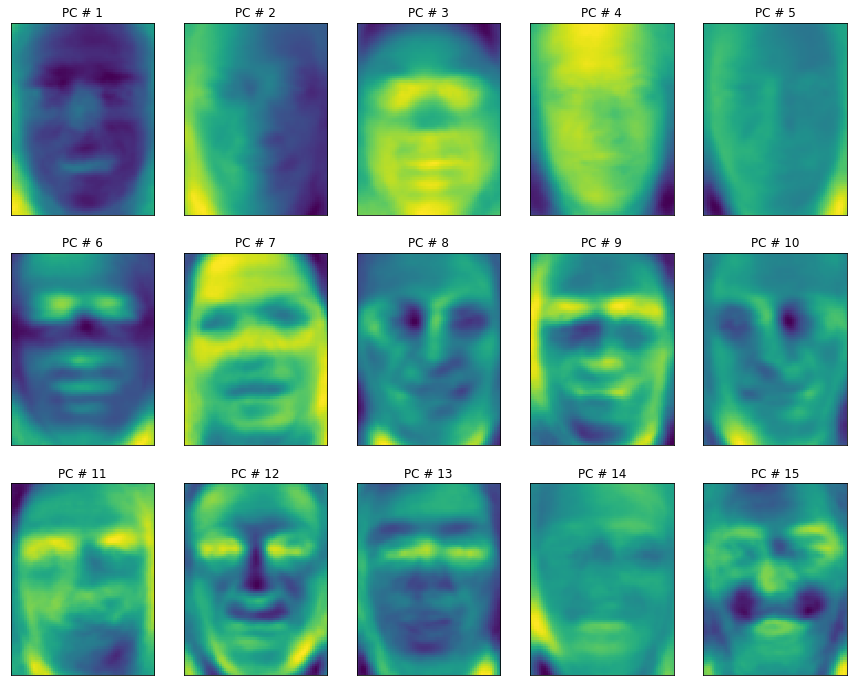

In [21]:
# 주성분 확인
print("pca.components_.shape: {}".format(pca.components_.shape))

fig, axes = plt.subplots(3, 5, figsize = (15,12),
                        subplot_kw={'xticks' :(), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("PC # {}".format((i+1)))

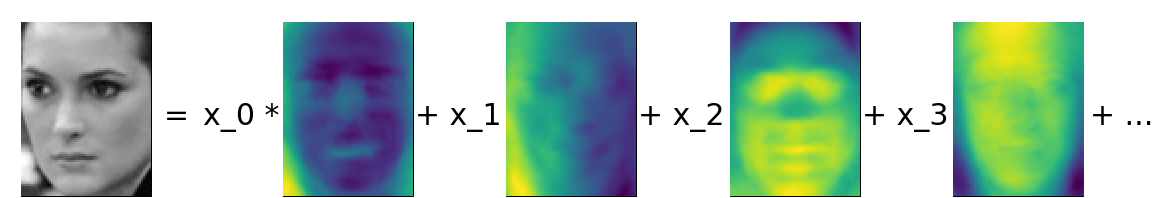

In [22]:
# 이미지를 주성분의 가중치 합으로 분해한 PCA 구성도

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

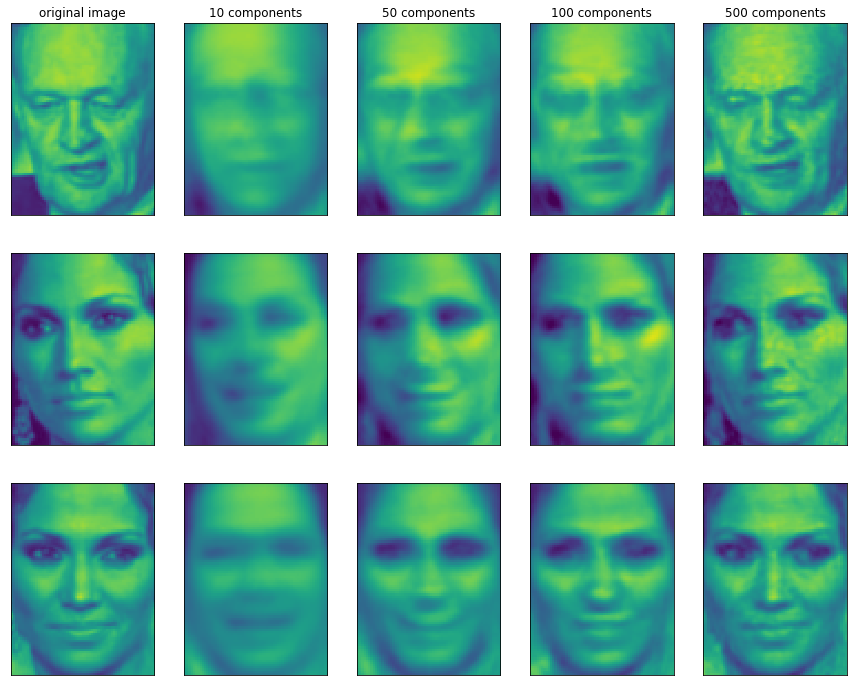

In [23]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

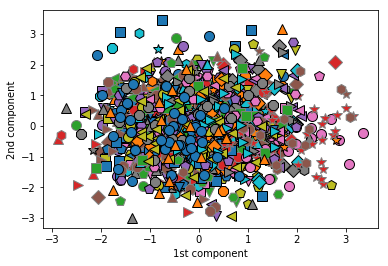

In [24]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("1st component")
plt.ylabel("2nd component")

### 3.4.2 비음수 행렬 분해 (Non-negative matrix factorization)
- 유용한 특성을 뽑아내기 위한 비지도 학습
- PCA하고도 비슷하고, 차원축소도 가능
- 음수가 아닌 성분과 계수 값을 찾음. 즉, 주성분과 게수가 모두 0보다 크거나 같아야 한다. 음수가 아닌 특성을 가진 데이터에만 적용이 가능
- 보통 오디오 트랙 등의 여러 악기로 이루어진 음악에 유용함.

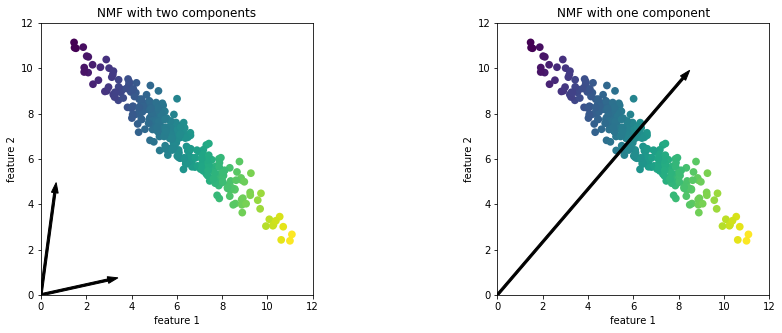

In [25]:
## 인위적 데이터에 적용하기
## 주어진 데이터가 양수인지 먼저 확인해야 하는 절차를 거쳐야 함.
## 원점 0.0에서 상대적으로 어디에 놓여 있는가?

mglearn.plots.plot_nmf_illustration()

- 성분이 둘이라면, 두개의 성분으로 표현가능
- 하나의 성분이라면 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분으로 향함
- 성분 개수를 줄이면 특정 방향 제거+전체 성분이 바뀜
- 무작위로 초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라짐.

데이터 인코딩, 재구성 용도보다는 데이터의 유용한 패턴을 찾는데에 더 좋음

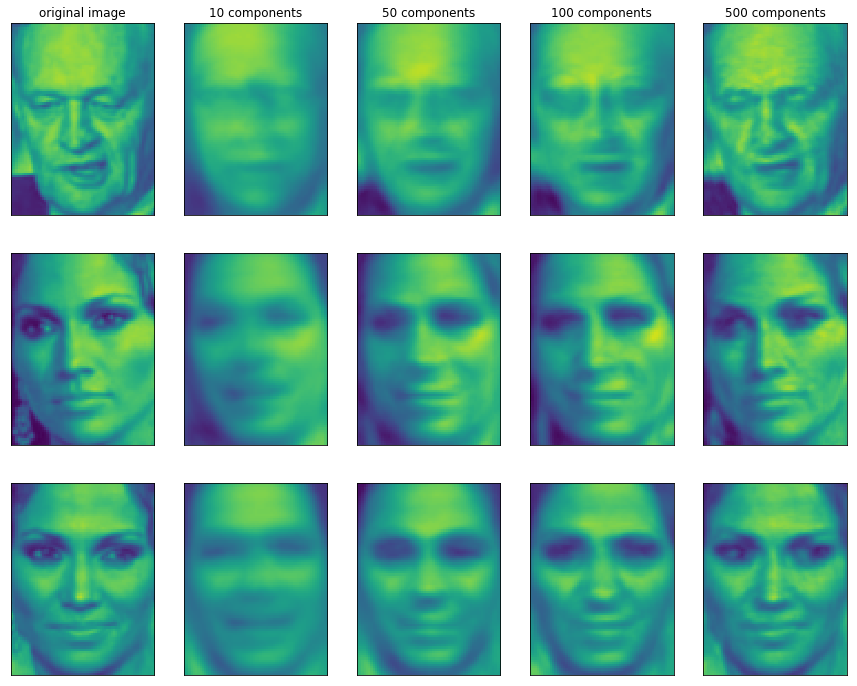

In [26]:
## 얼굴에 NMF 적용하기

mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

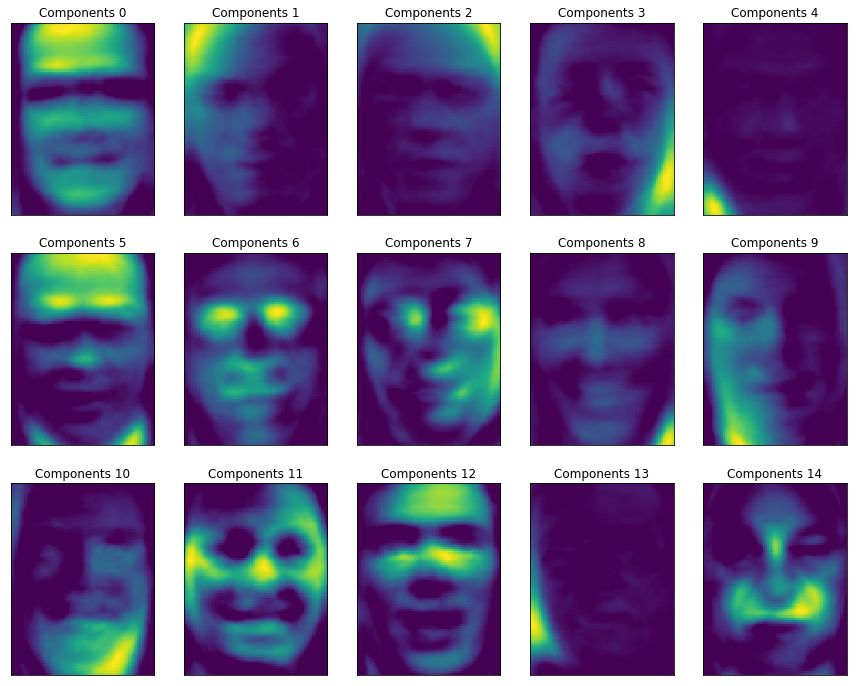

In [27]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("Components {}".format(i))

성분 3은 조금 돌아간 얼굴, 성분 7은 왼쪽으로 조금 회전한 얼굴.

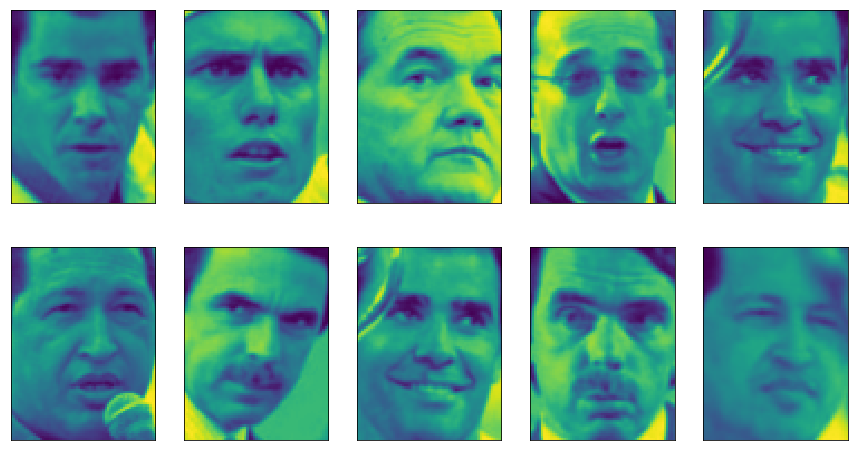

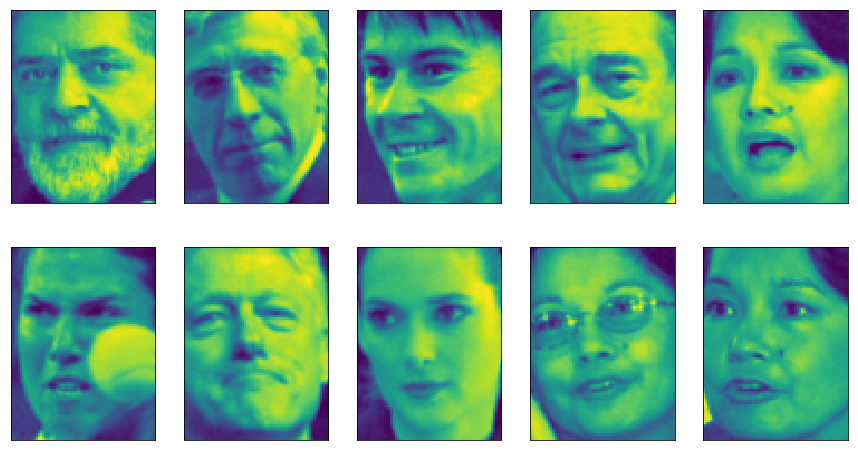

In [28]:
compn  =  3
 # 3번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다# 4번째 성분 
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    

compn = 7
# 7번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))


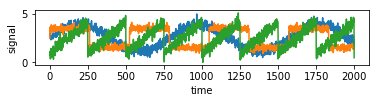

In [29]:
### 인위적인 데이터셋을 사용한 예

S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("time")
plt.ylabel("signal")

측정 데이터 형태: (2000, 100)
복원한 신호 데이터 형태: (2000, 3)


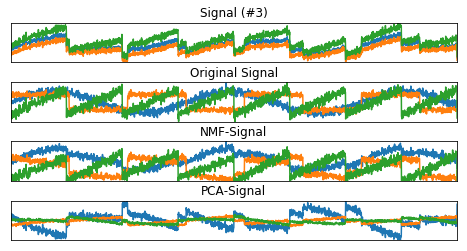

In [30]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))


nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))


pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [X, S, S_, H]
names = ['Signal (#3)',
         'Original Signal',
         'NMF-Signal', 
         'PCA-Signal']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)

NMF는 복원을 잘 시켰지만 PCA는 잘 되지 않았고 대부분을 첫 번째 성분으르 이용해 나타냈다.
나중에 패턴추출은 ICA, FA, sparse coding,(dictionary learning)에 대해서 공부하면 된다.

### 3.4.3 t_SNE를 이용한 매니폴드 학습
- PCA는 먼저 해볼만하지만 회전하고 방향을 제거하기 때문에 유용성이 떨어진다고 볼 수 있음
- 그에 반해 매니폴드 학습은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공함
- 보통 t-SNE를 사용(t-Distributed Stochastic Neigbor Embedding)
  - 새로운 표현으로 변화는 시키지만 새로운 데이터에는 적용을 못하기에 EDA에서만 사용함
  - **데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것**
    - 각 데이터 포인트를 2차원에 무작위로 표현 후
    - 원본 특성 공간에서 가까운 포인트는 가깝게, 먼 포인트는 멀어지게
    - 가까이 있는 포인트에 더 많이 비중을 둠. 이웃 데이터 포인트에 대한 정보를 보존하려고 함
 


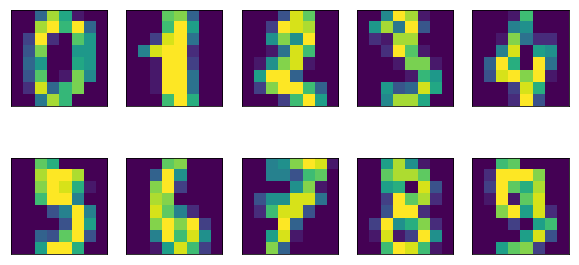

In [31]:
## digits dataset loading
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

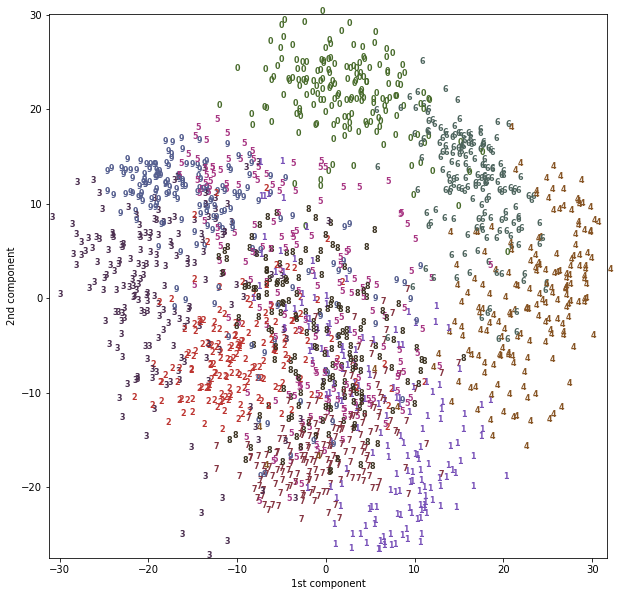

In [33]:
## pca로 데이터를 2차원으로 축소해서 시각화 하기

pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight' : 'bold', "size":8})
plt.xlabel("1st component")
plt.ylabel("2nd component")

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

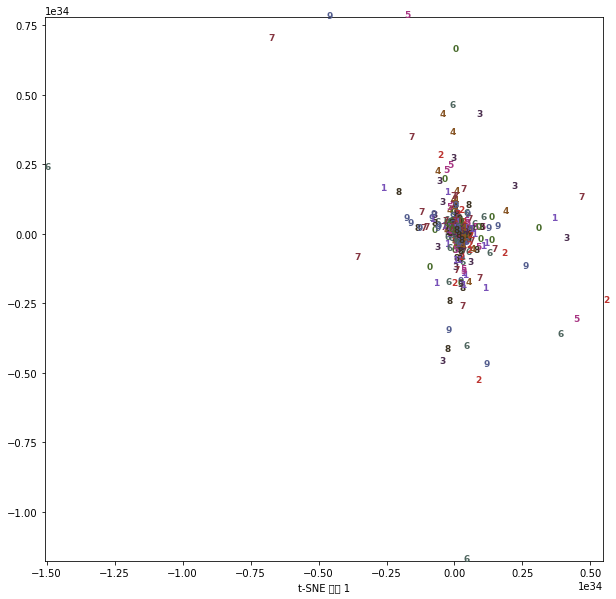

In [38]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.xlabel("t-SNE 특성 1")

## 3.5 군집
- 데이터셋을 클러스터라는 그룹으로 묶는 개념
- 클러스터 내의 포인트끼리는 비슷하고, 다른 클러스터들과고는 구분되도록
- 어느 데이터 포인ㅌ크가 어느 클러스터에 속하는지 할당/예측

### 3.5.1 k-means clustering
- 데이터의 어떤 영역을 대표하는 클러스터 중심을 찾음
  - 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고
  - 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정
  - 번화가 없을 때까지 돌아감

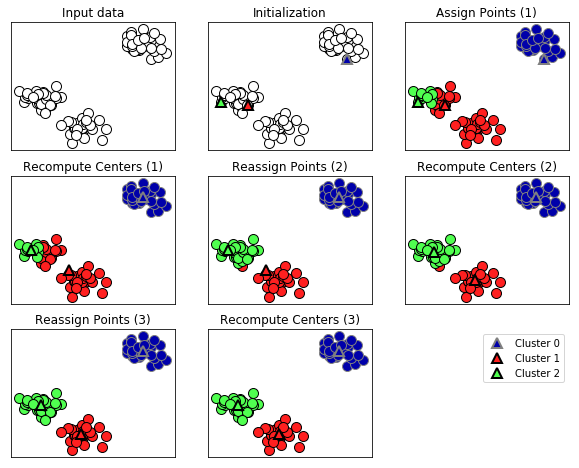

In [39]:
mglearn.plots.plot_kmeans_algorithm()

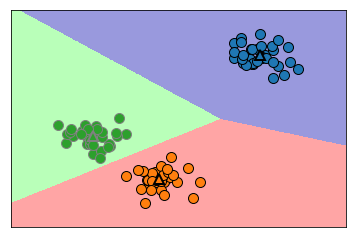

In [40]:
mglearn.plots.plot_kmeans_boundaries()

In [47]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print("Cluster label : \n{}".format(kmeans.labels_))
print("Cluster predict : \n{}".format(kmeans.predict(X)))

Cluster label : 
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
Cluster predict : 
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


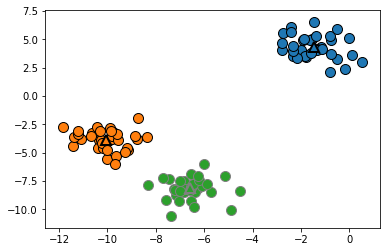

In [49]:
## 클러스터 중심 표시

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1], [0,1,2],
                        markers='^', markeredgewidth=2)

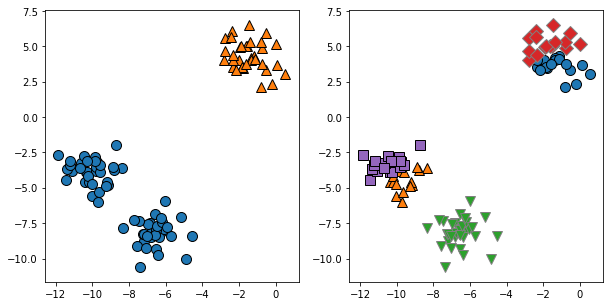

In [50]:
## 클러스터 수 조정
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#cluster=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

#cluster=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

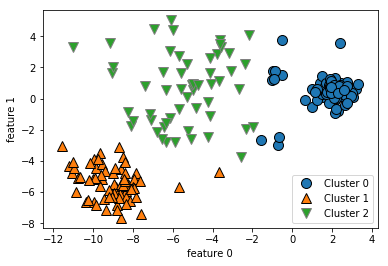

In [51]:
# k-means도 실패할 때가 있다
# 중심 하나뿐이므로 클러스터는 둥근 형태로 나타나게 그리기 때문에 원형은 구분은 못함
# 먼 거리 포인트도 인식한걸로 나옴

X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='best')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

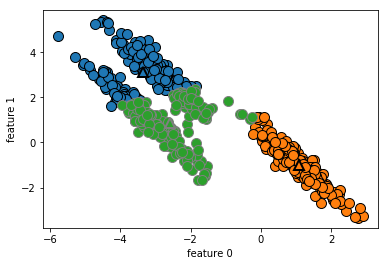

In [52]:
# 또한 클러스터에서 모든 방향이 똑같이 중요하다고 가정하기 때문에 대각선으로 늘어져 있으면 잘 처리가 안 됨

# randomstate
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 길게 늘임
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 3개의 클러스터
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당, 중심 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^', markeredgewidth=2)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

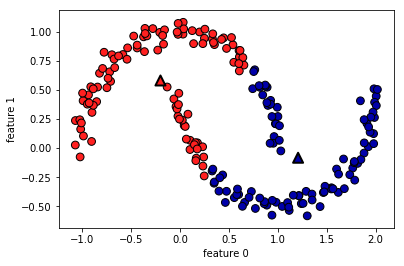

In [53]:
# 더 복잡한 데이터로 예시
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2개 클러스터
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당, 중심 표시
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

#### 벡터 양자화 또는 분해 메서드로서의 k-평균
- k-means, PCA, NMF는 유사점이 존재
  - PCA, NMF : 어떤 데이터 포인트를 어떤 성분의 합으로 표현. 
  - k-means : 클러스터 중심으로 각 데이터 포인트를 표현
  - *하나의 성분*으로 데이터 포인트를 표현하는 것
  - **k-means을 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것**을 *벡터 양자화*라고 함

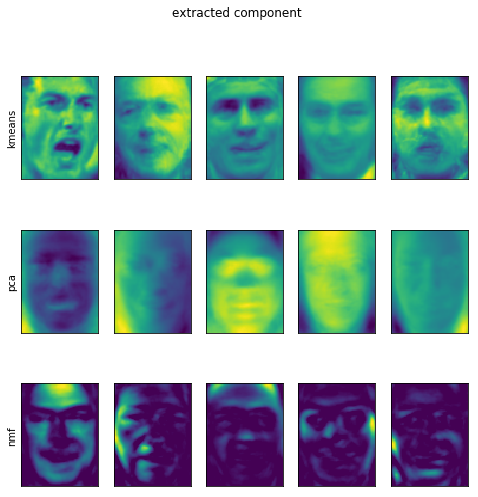

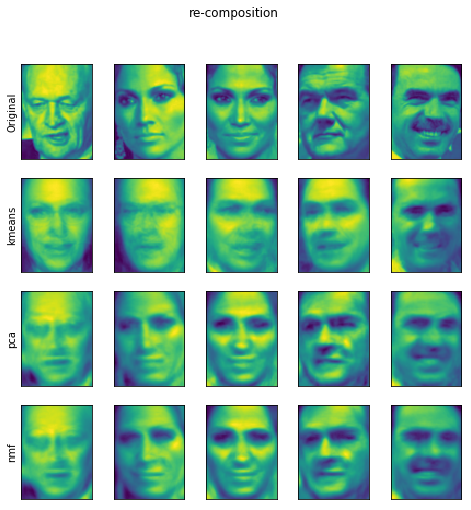

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("extracted component")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("re-composition")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):
    
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("Original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

kmeans를 사용하면 입력 데이터의 차원보다 더 많은 클러스터를 사용헤 데이터를 인코딩할 수 있음

Cluster label :
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


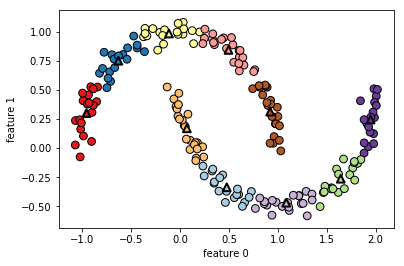

In [55]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")
print("Cluster label :\n{}".format(y_pred))

In [56]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태: {}".format(distance_features.shape))
print("클러스터 거리:\n{}".format(distance_features))

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
[[ 0.9220768   1.46553151  1.13956805 ...,  1.16559918  1.03852189
   0.23340263]
 [ 1.14159679  2.51721597  0.1199124  ...,  0.70700803  2.20414144
   0.98271691]
 [ 0.78786246  0.77354687  1.74914157 ...,  1.97061341  0.71561277
   0.94399739]
 ..., 
 [ 0.44639122  1.10631579  1.48991975 ...,  1.79125448  1.03195812
   0.81205971]
 [ 1.38951924  0.79790385  1.98056306 ...,  1.97788956  0.23892095
   1.05774337]
 [ 1.14920754  2.4536383   0.04506731 ...,  0.57163262  2.11331394
   0.88166689]]


10개 클러스터를 사용해서 0~9로 분할할 수 있었고, 반달모양을 잘 나타낼 수 있었음

- 이해하기 쉽고 빠른 편이라 인기가 있지만 난수초깃값에 따라 출력이 다르게 나타남
- 클러스터의 모양을 가정하고 있기 때문에 활용 범위가 제한적
- 클러스터의 갯수를 지정해야함

### 3.5.2 Agglomerative Clustering(병합 군집)
- 시작할 때 각 포인트를 하나의 클러스터로 지정
- 어떤 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터를 합쳐나감
- 싸이킷런의 경우는 클러스터 개수를 종료조건으로 지정. 
  - ward : 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침
  - avaerage : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합침
  - complete : 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침

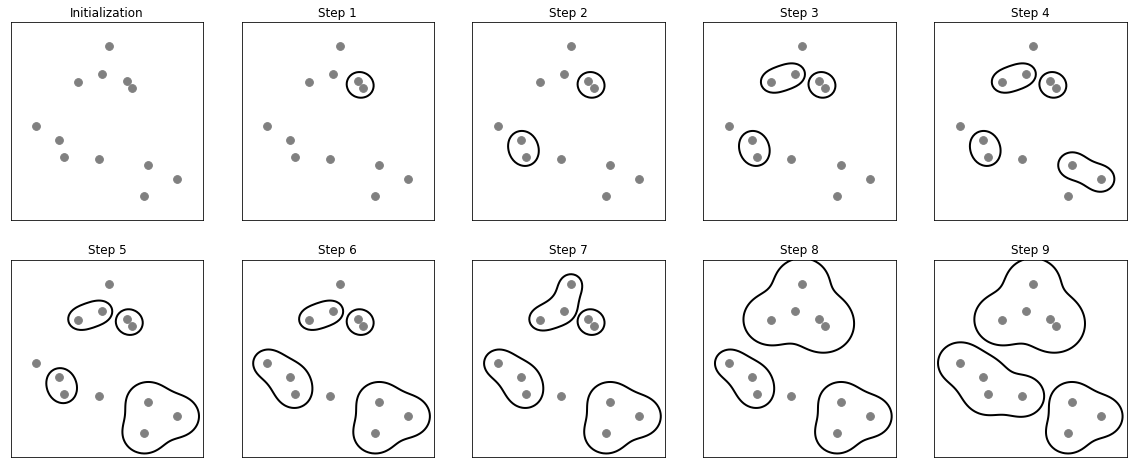

In [57]:
mglearn.plots.plot_agglomerative_algorithm()

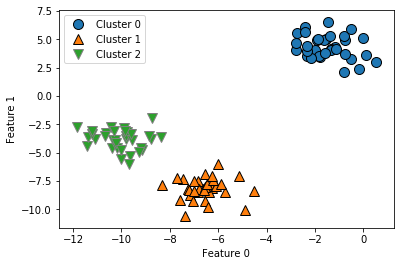

In [58]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 계층적 군집과 덴드로그램
- 병합 군집은 계층적 군집(Hierarchical clustering)을 만드는 과정임.
- 군집을 반복하여 진행하면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 됨

- 계층 군집의 모습이지만 특성이 셋 이상에서는 사용이 어려움
- 덴드로그램(dendrogram)의 경우에는 다차원 데이터셋을 처리할 수 있음


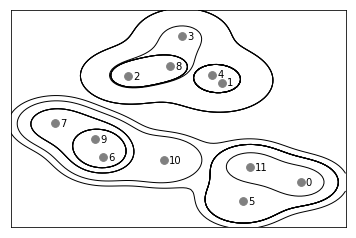

In [59]:
mglearn.plots.plot_agglomerative()

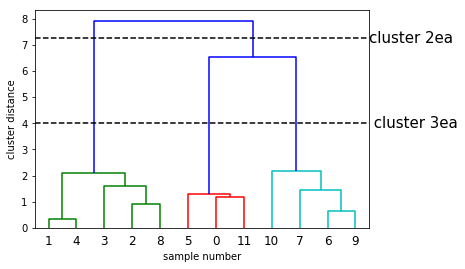

In [60]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 불러옴
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'cluster 2ea', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' cluster 3ea', va='center', fontdict={'size': 15})
plt.xlabel("sample number")
plt.ylabel("cluster distance")

### 3.5.3 DBSCAN(density-based spatial clustering of applications with noise)
- 클러스터 개수를 미리 지정할 필요가 없음
- 복잡한 형상도 찾을 수 있음
- 어떤 클래스에도 속하지 않는 포인트를 구분할 수 잉씀
- 큰 데이터셋에서도 적용 가능

- 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾음 -> Dense region
  - 데이터의 밀집 지역이 한 클러스터를 구성함.
  - 비교적 비어있는 지역을 경계로 다른 클러스터와 구분시킴
  
  - 밀집 지역에 있는 포인트 : 핵심 샘플(포인트)
  - min_samples, eps 라는 매개변수로 구성
  - 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수 만큼 들어 있으면 이 데이터 포인트를 핵심 샘플로 분류
  - eps보다 가까운 핵심 샘플은 EBSCAN에 의해 동일한 클러스터로 합쳐지게 된다. (기본값은 유클리디안)
    
   **작동 원리**
    - 시작 시 무작위로 포인트를 선택
    - 해당 포인트에서 eps 거리 안의 모든 포인트를 찾음
    - eps 거리 안에 있는 포인트 수가 min_samples보다 적으면 그 포인트는 어떤 클래스에도 잡히지 않는 잡음(noise)로 레이블링 한다.
    - 위와 반대로 eps 거리 안에 있는 포인트 수가 더 많다면 핵심 샘플로 레이블하고 새로운 클러스터 레이블을 할당
    - 그 포인트의 eps 거리 안의 모든 이웃들을 살핀다.
      - 만약 어떤 클러스터에도 아직 할당되지 않았따면 바로 전에 만든 클러스터 레이블으로 할당한다.
      - 핵심 샘플이라면 그 포인트의 이웃을 차례로 방문한다
    - 클러스터는 eps 거리 안에 더 이상의 핵심 샘플이 없을 때까지 자라나고. 방문하지 못한 포인트를 선택


클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


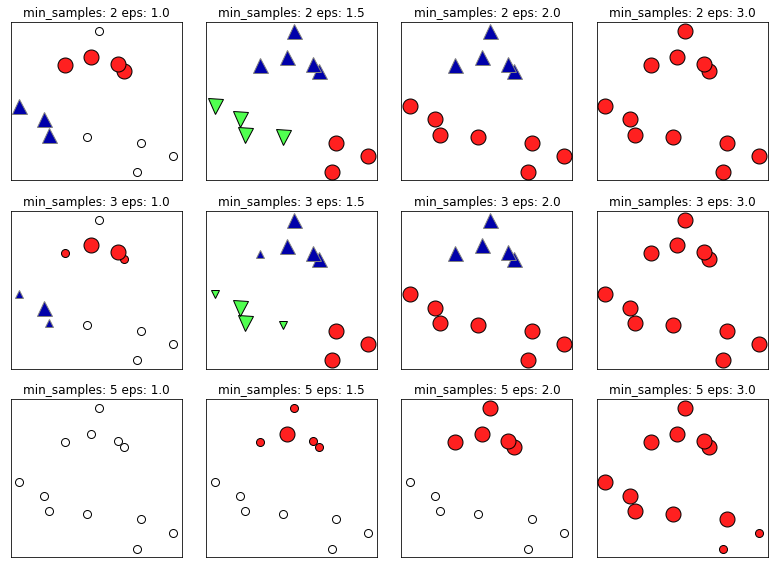

In [61]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n{}".format(clusters)) # -1 : 잡음 레이블

mglearn.plots.plot_dbscan()


- 클러스터에 속한 포인트 : 색이 있음
- 잡음 포인트 : 하얀색
- 핵심 샘플 : 크게 / 경계 포인트 : 작게


eps 증가 : 하나의 클러스터에 더 많은 포인트가 포함되어 클러스터가 커지고, 여러 클러스터가 합쳐짐
  - eps 매우 작게 할 시 어떤 포인트도 핵심 포인트가 되지 못하고 모든 포인트가 잡음 포인트가 됨
  - eps 매우 크게 할 시 모든 포인트가 단 하나의 클러스터에 속하게 됨
  
min_samples 증가 : 핵심 포인트가 줄어들고 잡음 포인트가 늘어남.
  - 기본적으로 덜 조밀한 지역의 포인트가 잡음/클러스터가 될 지 결정하는 역할임
 
DBSCAN은 클러스터의 개수를 지정할 필요가 ㅓㅂㅅ지만 eps의 값은 간접적으로 몇 개의 클러스터가 맏늘어질지 제어
Stnadardscaler 혹은 MinMaxScaler로 특성 스케일링이 필요함

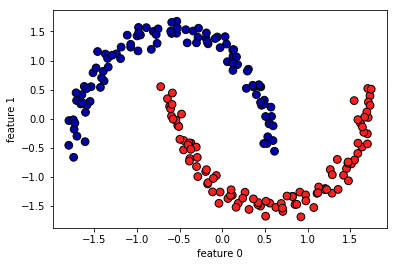

In [64]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Scaliling
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN() # eps = 0.5가 기본값
clusters = dbscan.fit_predict(X_scaled)


# 클러스터 할당
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, 
            edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

### 3.5.4 군집 알고리즘의 비교와 평가
알고리즘이 잘 작동하는지 평가하거나 출력을 비교하기가 어려움

### 타깃값으로 군집 평가하기

1이 최적, 0이 무작위일때의 값으로 표시해주는 ARI (adjusted rand index), NMI(normalized mutual information)이 주로 널리 사용되는 지표

ARI의 경우 무작위 할당보다 나쁘게 군집될 경우에는 음수값이 나올 때도 있다.

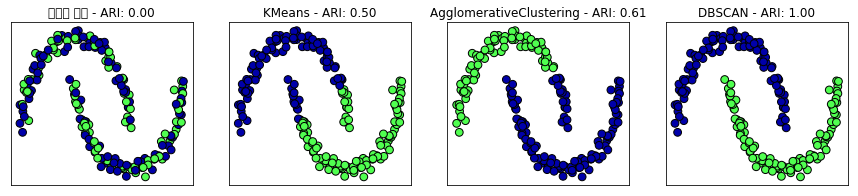

In [65]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듬
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

군집 모델을 평가할때는 군집용 측정도구를 사용해야 한다.

accuracy_score를 사용하는 것은 그 레이블이 실제 레이블 이름과 맞는지 확인하는 것인데, 클러스터 레이블은 포인트들이 같은 클러스터에 속해있는 것만을 중요시 여김

In [66]:
from  sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# 모든 레이블이 달라졌으므로 정확도는 0입니다
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1입니다
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


### 타깃값 없이 군집 평가하기
ARI의 경우에는 결과와 비교할 타깃값이 없음. 보통 그래서 성능평가보다는 알고리즘 개발에 쓰이고 있음

타깃값이 필요하지 않은 군집용 지표는 실루엣 계수 (silhouette coefficient) 가 있으나 잘 작동하는 편은 아니다. 클러스터의 밀집 정도를 계산(1~0)

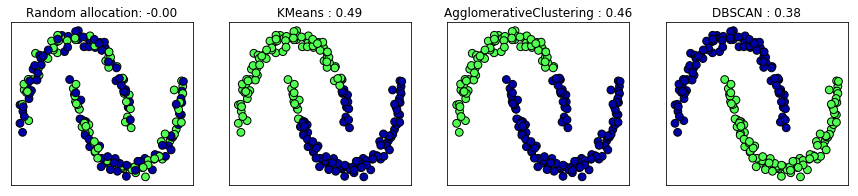

In [69]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("Random allocation: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

육안으로 보는 결과는 DBSCAN이 더 나으나 점수가 k-means에 비해 떨어지는 모양을 보임. 

클러스터 평가에 더 적합한 것은 견고성 기반의 지표

#### 얼굴 데이터셋으로 군집 알고리즘 비교

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)


dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: {}".format(np.unique(labels)))

고유한 레이블: [-1]


In [79]:
## -1은 잡음포인트므로 min_samples를 줄임

dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: {}".format(np.unique(labels)))

## eps도 같이 변경
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: {}".format(np.unique(labels)))

# 잡음 포인트와 클러스터에 속한 포인트 수를 셉니다.
# bincount는 음수를 받을 수 없어서 labels에 1을 더했습니다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수입니다.
print("클러스터별 포인트 수: {}".format(np.bincount(labels + 1)))

고유한 레이블: [-1]
고유한 레이블: [-1  0]
클러스터별 포인트 수: [  32 2031]


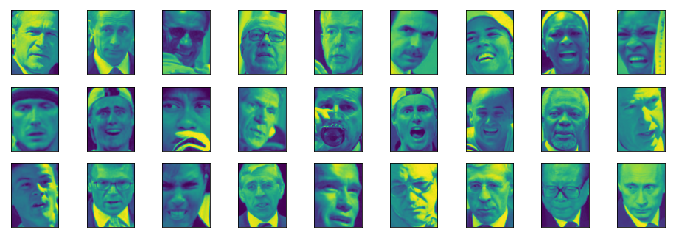

In [80]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

각도가 이상하거나, 너무 가까이/멀리 찍었거나, 얼굴이 가려졌거나, 모자 등의 사진이 검출되었음

이렇게 특이한 것을 찾아내는 종류 분석을 이상치 검출(outlier detection)이라고 함

In [81]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("cluster number: {}".format(len(np.unique(labels))))
    print("cluster size: {}".format(np.bincount(labels + 1)))


eps=1
cluster number: 1
cluster size: [2063]

eps=3
cluster number: 1
cluster size: [2063]

eps=5
cluster number: 1
cluster size: [2063]

eps=7
cluster number: 14
cluster size: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
cluster number: 4
cluster size: [1308  749    3    3]

eps=11
cluster number: 2
cluster size: [ 415 1648]

eps=13
cluster number: 2
cluster size: [ 120 1943]


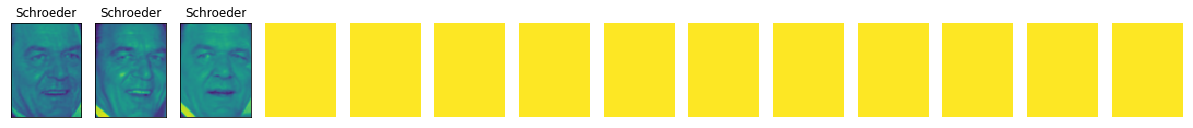

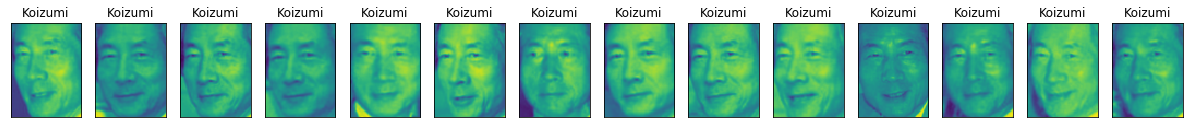

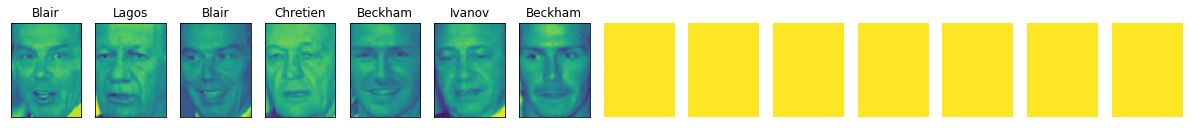

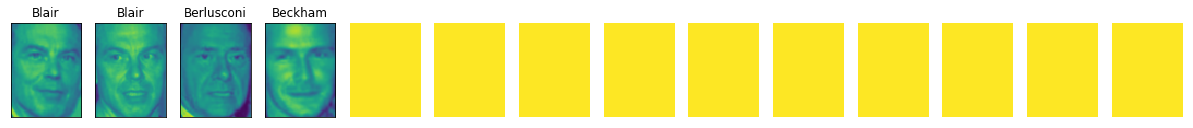

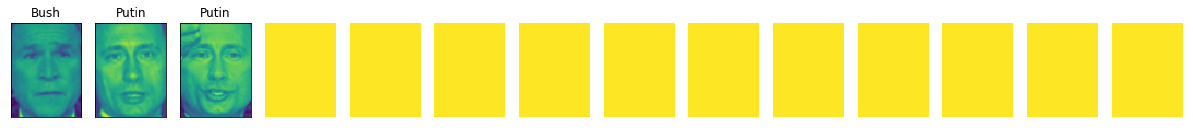

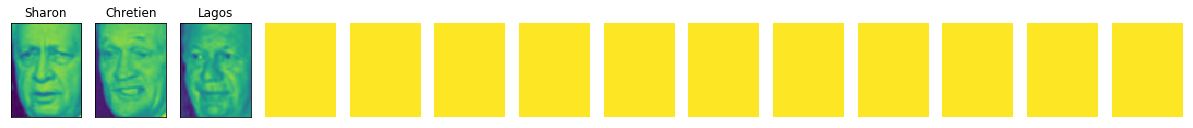

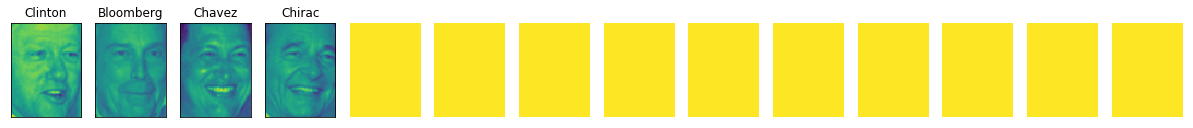

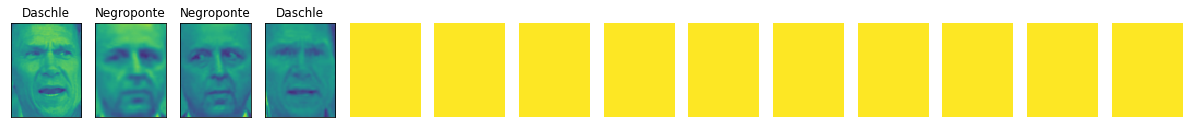

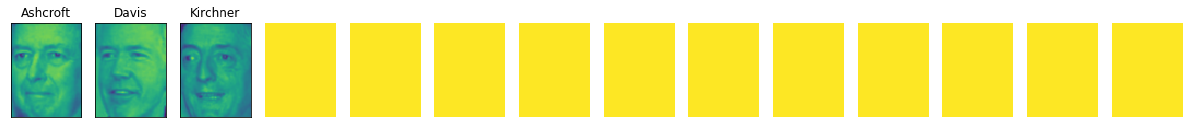

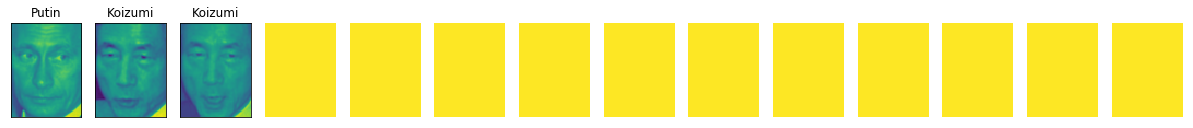

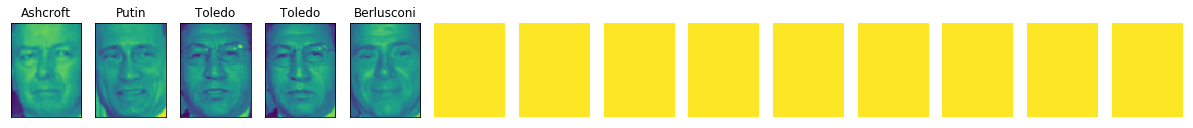

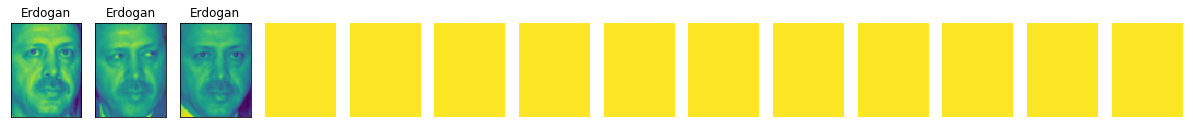

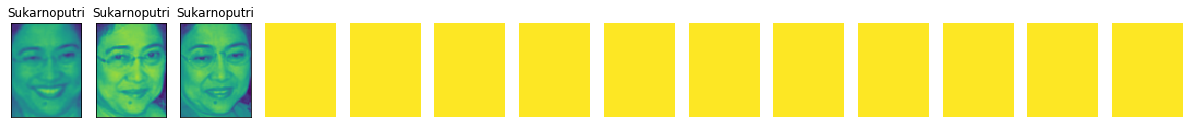

In [82]:
## eps를 7로 계산했을때 클러스터가 여러가지로 많이 만들어져있기에 한번 보는것.

dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

얼굴 특성이 뚜렷한 슈뢰더, 고이즈미는 제대로 추출되었음. 여튼 뽑힌 사람들 특징이 얼굴 표정이나 각도가 비슷하게 뽑히긴 했다.

k-평균의 클러스터 크기: [155 175 238  75 358 257  91 219 323 172]


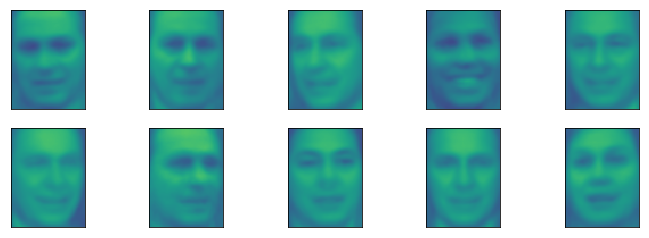

In [83]:
### k-means로 얼굴 데이터셋 분석하기

n_clusters  = 10

km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기: {}".format(np.bincount(labels_km)))


fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)

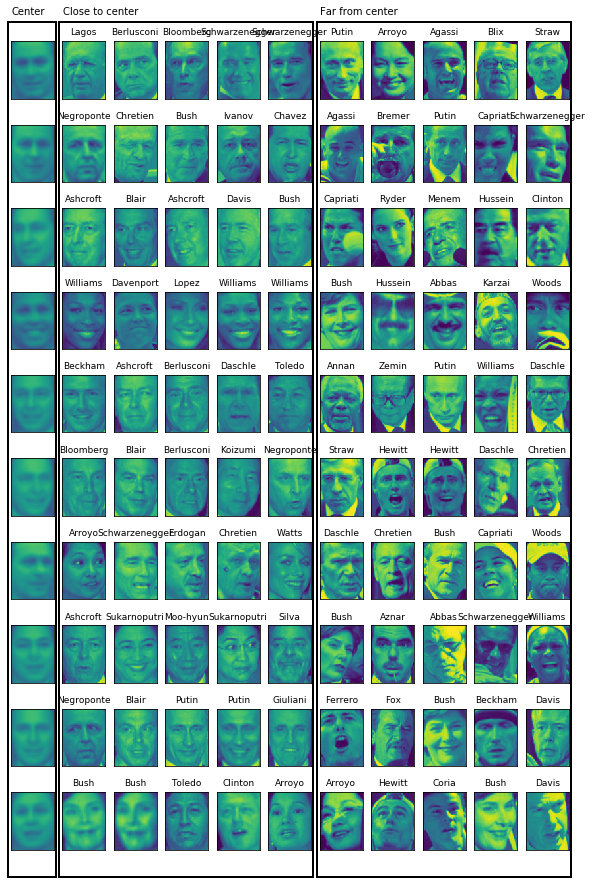

In [84]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

### 병합 군집으로 얼굴 데이터셋 분석하기

병합 군집의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]
ARI: 0.09


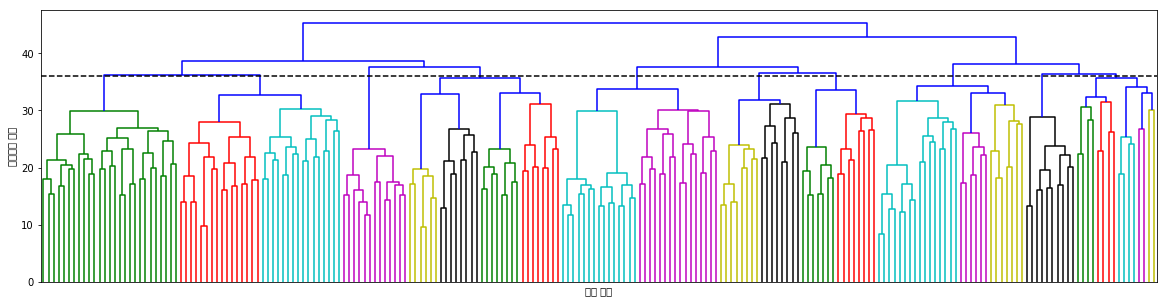

In [87]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기: {}".format(np.bincount(labels_agg)))
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

linkage_array = ward(X_pca)
# 클러스터 사이의 거리가 담겨있는 linkage_array로 덴드로그램을 그립니다
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

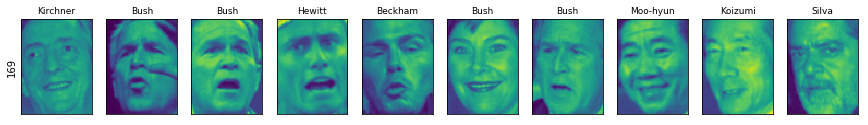

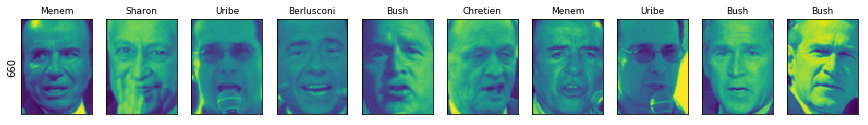

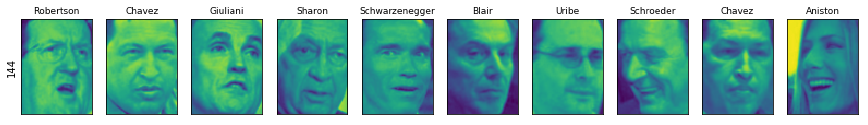

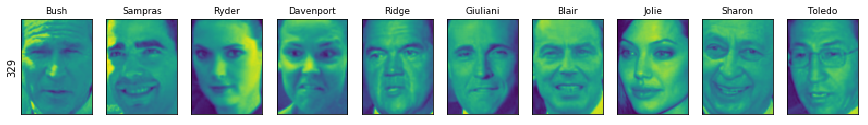

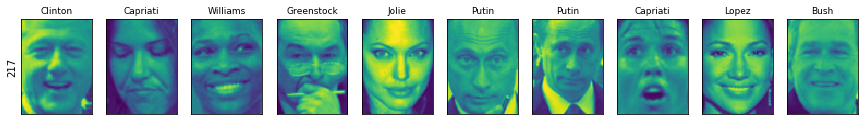

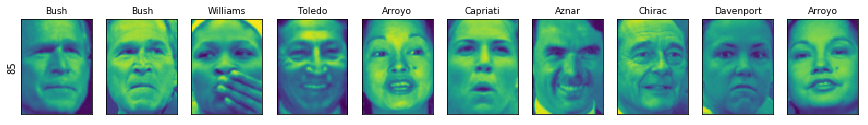

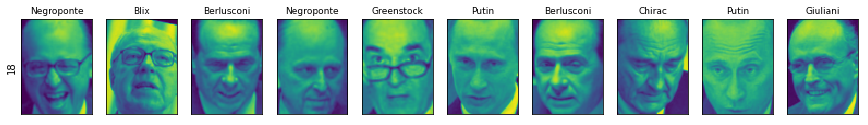

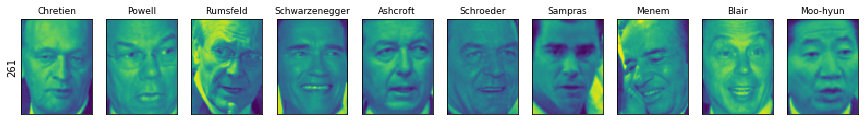

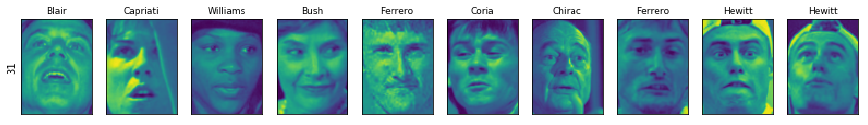

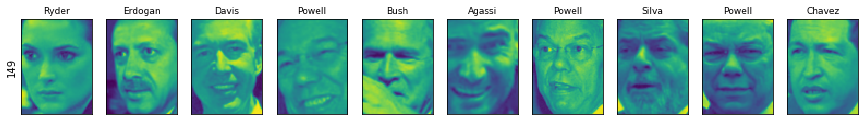

In [88]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

병합 군집의 클러스터 크기: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


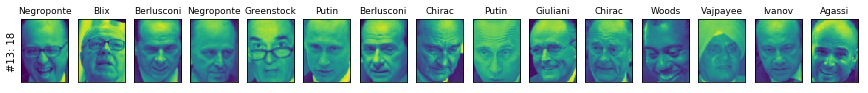

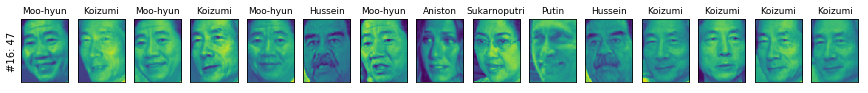

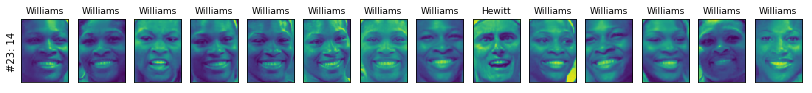

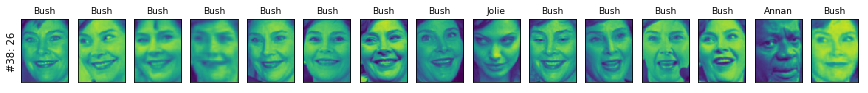

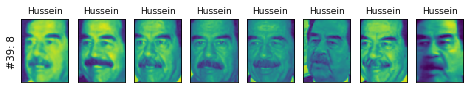

In [89]:
## 클러스터를 40개로 늘려서 다시 추출

agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]: # 흥미로운 클러스터 몇개를 골랐습니다
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

### 3.5.3 군집 알고리즘 요약

- k-meeans ; 클러스터 개수 지정, 클러스터 중심을 사용해 클러스터 구분, 데이터 포인트를 '중심'으로 대표할 수 있기 때문에 분해의 일종으로도 볼 수 있음.
- DBSCAN ; eps 매개변수를 사용하여 크기 간접적으로 조절, 클러스터 할당되지 않는 잡음 포인트를 인식할 수 있으며 개수를 자동으로 결정함. 복잡한 데이터 (two_moon같은) 도 분류할 수 있음, 크기가 많이 다른 클러스터를 만들어 냄
- 병합 군집 ; 클러스터 개수 지정, 전체 데이터의 분할 계층도를 만들어주고 덴드로그램으로 확인이 가능함

## 3.6 요약 및 정리